In [4]:
import numpy as np
%pylab inline
from matplotlib import pyplot as plt
import csv

Populating the interactive namespace from numpy and matplotlib


In [8]:
def FindErrTotalTimePercetage(OpenfileName, n, Datee):
    with open(OpenfileName, 'r') as csvfile:
    # 讀取 CSV 檔案內容
        rows = csv.reader(csvfile)
        data = list(rows)
    t=0
    Timess =0
    length = int((len(data)))
    hapen=0
    inteval = []
    for i in range(1,len(data)):
        R1 =   float(data[i][11])
        R2 =   float(data[i][12])
        if ((t > n) & (2.0>R2>1.0) & (2.0>R1>1.0)):
            beforT = int(hapen[0:2])*60+int(hapen[3:5])
            if (int(hapen[0:2])<=int(data[i][1][2:4])):
                afterT = int(data[i][1][2:4])*60+int(data[i][1][5:7])
                # print(f'{beforT},--{afterT}')
            else:
                afterT = (int(data[i][1][2:4])+24)*60+int(data[i][1][5:7])
            inteval.append(afterT-beforT)
            Timess+=1
        if((2.0>R2>1.0) & (2.0>R1>1.0)):
            t=0
        else: t+=1
        if(t == n):
            hapen = data[i-t][1][2:7]
            # print(data[i-t][1][2:7])
    print(Datee)
    print(length*30/60)

    print(sum(inteval))
    totalTM = sum(inteval)
    percent = (totalTM/(length*30/60))*100
    return percent

In [9]:
per  = FindErrTotalTimePercetage('data/process/V4b(2)_0417_HK30TM1_370(P).CSV', 6, '0417_HK30TM1_370')
print(f'----------->{per}')

# per  = FindErrTotalTimePercetage('data/process/V4b(2)_0401_HK30TM1_SW374_FWgpio(P).CSV', 6, '0401_HK30TM1_SW374_FWgpio')
# print(f'----------->{per}')
per  = FindErrTotalTimePercetage('data/process/V4b(2)_0411_HK30TM1_373(P).CSV', 6, '0408_HK30TM30')
# # per  = FindErrTotalTimePercetage('data/process/V4b(2)_0307_HK30TM30(P).CSV', 6, '0307_HK30TM30')
print(f'----------->{per}')
# per  = FindErrTotalTimePercetage('data/process/V4b(2)_0404_HK30TM10_374(P).CSV', 6, '0404_HK30TM10')
# print(f'----------->{per}')

# per  = FindErrTotalTimePercetage('data/process/V4b(2)_0409_HK30TM1_353(P).CSV', 6, '0409_HK30TM1')
# print(f'----------->{per}')

0417_HK30TM1_370
2805.0
4
----------->0.14260249554367202
0408_HK30TM30
1456.0
0.0
----------->0.0


In [60]:
def FindErrTotalTimeinterval(OpenfileName, n, Datee):
    with open(OpenfileName, 'r') as csvfile:
    # 讀取 CSV 檔案內容
        rows = csv.reader(csvfile)
        data = list(rows)
    t=0
    Timess =0
    length = int((len(data)))
    hapen=0
    inteval = []
    for i in range(1,len(data)):
        R1 =   float(data[i][11])
        R2 =   float(data[i][12])
        if ((t > n) & (2.0>R2>1.0) & (2.0>R1>1.0)):
            beforT = int(hapen[0:2])*60+int(hapen[3:5])
            if (int(hapen[0:2])<=int(data[i][1][2:4])):
                afterT = int(data[i][1][2:4])*60+int(data[i][1][5:7])
                # print(f'{beforT},--{afterT}')
            else:
                afterT = (int(data[i][1][2:4])+24)*60+int(data[i][1][5:7])
            inteval.append(round(beforT/60,3))
            # Timess+=1
        if((2.0>R2>1.0) & (2.0>R1>1.0)):
            t=0
        else: t+=1
        if(t == n):
            hapen = data[i-t][1][2:7]
    # print(inteval)
    inteval_F = np.zeros(len(inteval)-1)
    for i in range(len(inteval)-1):
        if (inteval[i]<inteval[i+1]):
            inteval_F[i] = (inteval[i+1] - inteval[i])
        if (inteval[i]>inteval[i+1]):
            inteval_F[i] = ((inteval[i+1]+24) - inteval[i])
    return inteval_F




In [67]:
time_intervals = FindErrTotalTimeinterval('data/process/V4b(2)_0219_5days(P).CSV', 16, '0219_5days')
for i in range(len(time_intervals)-1):
    time_intervals[i+1] = time_intervals[i] + time_intervals[i+1]
time_intervals

array([  5.9  ,  11.334,  28.95 ,  29.55 ,  30.184,  53.05 ,  53.7  ,
        56.134,  58.067,  63.1  ,  68.317,  69.634,  70.05 ,  75.367,
        79.734,  82.967,  91.434,  99.184, 112.784, 115.8  , 119.7  ])

發生故障的時間間隔：[ 5.9    5.434 17.616  0.6    0.634 22.866  0.65   2.434  1.933  5.033
  5.217  1.317  0.416  5.317  4.367  3.233  8.467  7.75  13.6    3.016
  3.9  ]


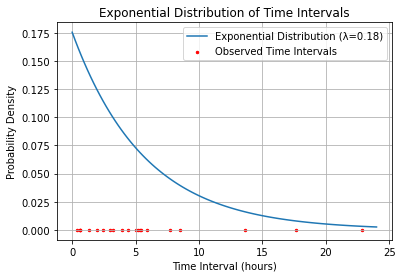

In [70]:
# inteval = FindErrTotalTimeinterval('data/process/V4b(2)_0219_5days(P).CSV', 16, '0219_5days')
# 觀察到的故障時間間隔
time_intervals = FindErrTotalTimeinterval('data/process/V4b(2)_0219_5days(P).CSV', 16, '0219_5days')
print(f'發生故障的時間間隔：{time_intervals}')

# 計算平均值作為 lambda
lambda_val = 1/np.mean(time_intervals)

# 定義指數分佈的概率密度函數
def exponential_pdf(x, lambda_val):
    return lambda_val * np.exp(-lambda_val * x)

# 繪製指數分佈的 PDF 圖形
x_values = np.linspace(0, 24, 100)  # 生成 x 軸數據
plt.plot(x_values, exponential_pdf(x_values, lambda_val), label='Exponential Distribution (λ={:.2f})'.format(lambda_val))
plt.scatter(time_intervals, np.zeros_like(time_intervals), color='red', s=6, label='Observed Time Intervals')  # 將觀察到的時間間隔用紅點表示
plt.xlabel('Time Interval (hours)')
plt.ylabel('Probability Density')
plt.title('Exponential Distribution of Time Intervals')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
sample_std = np.std(time_intervals, ddof=1)
1/(sample_std**0.5)

0.41422456009121894

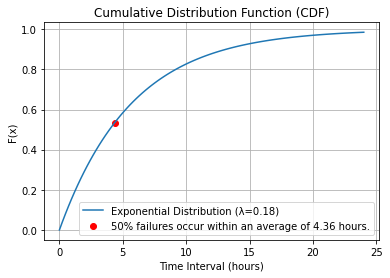

In [83]:
# 定義指數分佈的CDF
def exponential_cdf(x, lambda_val):
    return 1 - np.exp(-lambda_val * x)

Fx = exponential_cdf(x_values, lambda_val)
for i in range(len(Fx)):
    if 0.542<Fx[i] < 0.545:
        M_x = x_values[i]
        M_y = Fx[i]

# 繪製CDF圖
plt.plot(x_values, Fx , label='Exponential Distribution (λ={:.2f})'.format(lambda_val))
plt.scatter(M_x, M_y, color='red', label=f'50% failures occur within an average of {round(M_x,2)} hours.')
plt.xlabel('Time Interval (hours)')
plt.ylabel('F(x)')
plt.title('Cumulative Distribution Function (CDF)')
plt.grid(True)
plt.legend()
plt.show()